This scripts introduces two skills in matplotlib.plot, setting date format for x-axis and plot different types of data on two canvas. We start with importing all the packages that we use and read the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
def get_df(path, columns):
    df = pd.read_csv(path)
    df['Date']=pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    return df[columns]
df=get_df('data/S&P500.csv',['Adj Close', 'Volume'])
x = df.index
px = df['Adj Close'].values
vol = df['Volume'].values

When plotting price and volume data together, it could become messy as the two are in very different scales. A bad example is shown below:

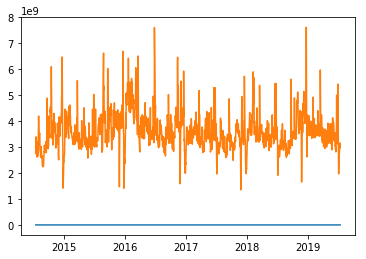

In [2]:
plt.plot(x, px)
plt.plot(x, vol)
plt.show()

In the above case, the price data is not well presented as it is too small compared to the volume data. To solve this issue, we'd like to plot them on different axis. We'll use the left y-axis for the price and right y-axis for the volume, but sharing the same x-axis. To do that, we create a twin axis and then plot.

In addition, we'd like to plot the volume in shadows as that's the more common way to present volume data. 

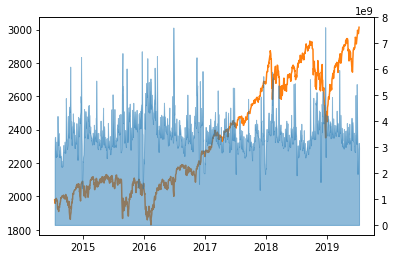

In [3]:
ax = plt.gca()
ax2 = ax.twinx()
ax2.fill_between(x, vol, color='tab:blue', alpha=0.5)
ax.plot(x, px, color='tab:orange')
plt.show()

When plotting stock price, sometimes we want to set different formats for the date axis. When plotting for over 20 years of data, we might want to show 5 years per tick, and when plotting only 1 weeks of data we might want to show daily date information. To do that, we use the Year/Month locator and DateFormatter. 

Two use cases are given below:

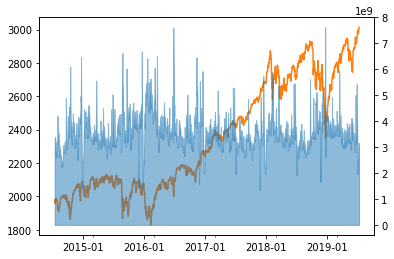

In [4]:
ax = plt.gca()
ax2 = ax.twinx()
ax2.fill_between(x, vol, color='tab:blue', alpha=0.5)
ax.plot(x, px, color='tab:orange')

ax.xaxis.set_major_locator(YearLocator(1))
ax.xaxis.set_minor_locator(MonthLocator(3))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.show()

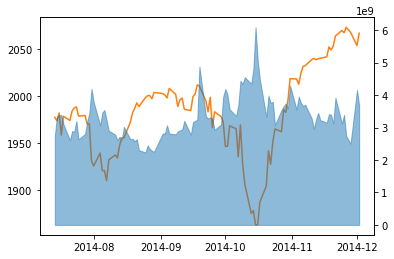

In [5]:
x = df.index[:100]
px = df['Adj Close'].values[:100]
vol = df['Volume'].values[:100]
ax = plt.gca()
ax2 = ax.twinx()
ax2.fill_between(x, vol, color='tab:blue', alpha=0.5)
ax.plot(x, px, color='tab:orange')

ax.xaxis.set_major_locator(MonthLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

plt.show()